In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer,normalize

In [286]:
driver_df = pd.read_csv('Datasets/data_1024.csv', delimiter='\t')

In [287]:
driver_df.head(20)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [119]:
driver_df = driver_df[['Distance_Feature', 'Speeding_Feature']]

In [120]:
driver_df.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [207]:
driver_df = driver_df.astype(np.float32)

driver_df.dtypes

Distance_Feature    float32
Speeding_Feature    float32
dtype: object

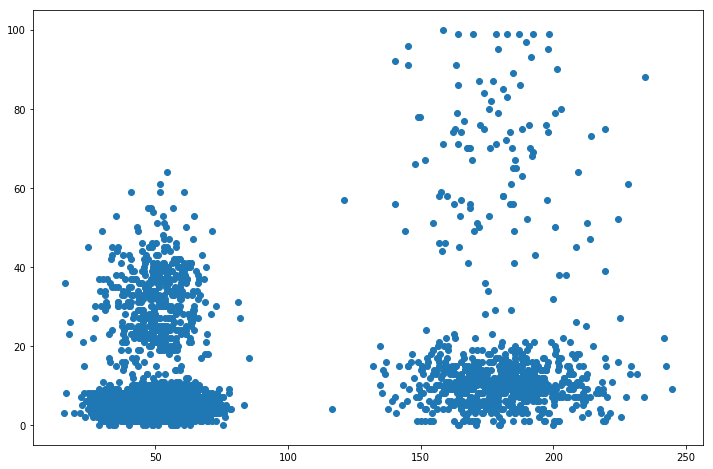

In [208]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(driver_df['Distance_Feature'], driver_df['Speeding_Feature'])

In [209]:
def cosine_similarity_manual(d1, d2):
    
    x1 = d1[0]
    y1 = d1[1]

    x2 = d2[0]
    y2 = d2[1]
    
    magnitude = math.sqrt(x1*x1 + y1*y1) * math.sqrt(x2*x2 + y2*y2)
    
    dot_product = x1*x2 + y1*y2
    
    return dot_product / magnitude

In [210]:
d1 = driver_df.loc[0]
d2 = driver_df.loc[1]
d3 = driver_df.loc[8]

In [211]:
d1

Distance_Feature    71.239998
Speeding_Feature    28.000000
Name: 0, dtype: float32

In [212]:
cosine_similarity_manual(d1, d2)

0.9975714725306971

In [213]:
cosine_similarity_manual(d1, d3)

0.8991255469171173

In [214]:
cosine_similarity(d1.values.reshape(1, -1), d2.values.reshape(1, -1))

array([[0.99757147]], dtype=float32)

In [215]:
cosine_similarity(d1.values.reshape(1, -1), d3.values.reshape(1, -1))

array([[0.8991256]], dtype=float32)

In [216]:
normalized_df = pd.DataFrame(normalize(driver_df, norm='l2'), columns=driver_df.columns)

In [217]:
normalized_df.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437


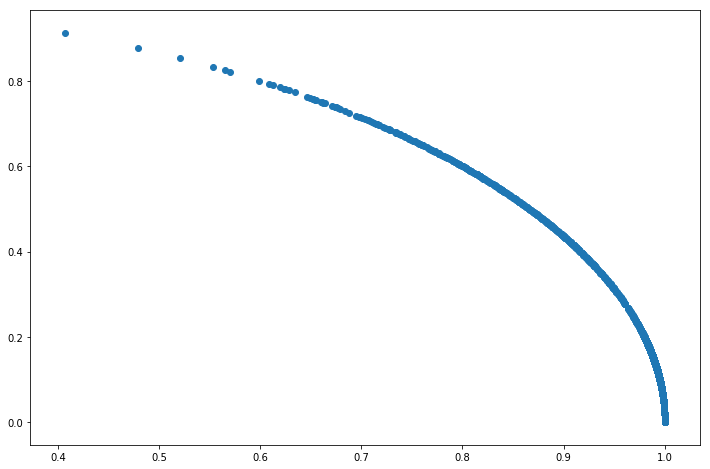

In [218]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(normalized_df['Distance_Feature'], normalized_df['Speeding_Feature'])

In [219]:
normalized_df['Magnitude'] = normalized_df['Distance_Feature'] * normalized_df['Distance_Feature'] + \
        normalized_df['Speeding_Feature'] * normalized_df['Speeding_Feature']

In [220]:
normalized_df.head(10)

,Distance_Feature,Speeding_Feature,Magnitude
0,0.930694,0.365798,1.0
1,0.902956,0.429733,1.0
2,0.922526,0.385934,1.0
3,0.930058,0.367414,1.0
4,0.909165,0.416437,1.0
5,0.972694,0.232091,1.0
6,0.946465,0.322805,1.0
7,0.988380,0.152000,1.0
8,0.676705,0.736255,1.0
9,0.919070,0.394095,1.0


In [221]:
def cosine_similarity_manual_normalized(d1, d2):
    
    x1 = d1[0]
    y1 = d1[1]

    x2 = d2[0]
    y2 = d2[1]
    
    magnitude = 1
    
    dot_product = x1*x2 + y1*y2
    
    return dot_product / magnitude

In [222]:
d1 = normalized_df.loc[0]
d2 = normalized_df.loc[1]
d3 = normalized_df.loc[8]

In [223]:
cosine_similarity_manual_normalized(d1, d2)

0.9975714125425322

In [224]:
cosine_similarity_manual_normalized(d1, d3)

0.8991255212334939

### Clustering in TensorFlow using KMeansClustering and cosine similarity

In [225]:
!pip install -U tensorflow

Requirement already up-to-date: tensorflow in /anaconda3/lib/python3.7/site-packages (1.13.1)


In [278]:
import tensorflow as tf

from tensorflow.contrib.factorization import KMeansClustering

In [279]:
print(tf.__version__)

1.13.1


In [280]:
def input_fn(x):
    return tf.train.limit_epochs(
        tf.convert_to_tensor(x, dtype=tf.float32), 
        num_epochs=1)

In [269]:
kmeans_estimator = KMeansClustering(num_clusters=2, distance_metric=KMeansClustering.COSINE_DISTANCE)

drivers_array = driver_df.values.astype(np.float32)

drivers_array

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]], dtype=float32)

In [283]:
# FOR RECORDING: Uncomment this and record the second time around
# kmeans_estimator = KMeansClustering(num_clusters=2, distance_metric=KMeansClustering.COSINE_DISTANCE)

# drivers_array = normalized_df[['Distance_Feature', 'Speeding_Feature']].values.astype(np.float32)

# drivers_array

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/7q/7xgwqct55qs1t7v2314x2jtw0000gr/T/tmpc52tn_4g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13d6387b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


array([[0.93069434, 0.36579788],
       [0.90295583, 0.4297334 ],
       [0.92252624, 0.3859344 ],
       ...,
       [0.99754417, 0.07003997],
       [0.9995974 , 0.02837508],
       [0.99856865, 0.0534852 ]], dtype=float32)

In [284]:
num_iterations = 5

for _ in range(num_iterations):
    kmeans_estimator.train(input_fn=lambda: input_fn(drivers_array), steps=1)
    
    cluster_centers = kmeans_estimator.cluster_centers()


print('\n\nCluster centers:\n', cluster_centers)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7q/7xgwqct55qs1t7v2314x2jtw0000gr/T/tmpc52tn_4g/model.ckpt.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/7q/7xgwqct55qs1t7v2314x2jtw0000gr/T/tmpc52tn_4g/model.ckpt.
INFO:tensorflow:Loss for final step: None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7q/7xgwqct55qs1t7v2314x2jtw0000gr/T/tmpc52tn_4g/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/7q/7xgwqct55qs1t7v2314x2jtw0000gr/T/tmpc52tn_4g/model.ckpt.
INFO:tenso